[ 14339.  20544.  26541.  31899.  36482.  41973.  46871.  52035.  56951.
  61968.  67259.  72227.  77645.  83142.  89225.  95666. 102012. 108915.
 115951. 123537. 131631. 140809. 150561. 161621. 173683. 186960. 201114.
 215783. 231269. 246955. 263345. 279874. 296521. 313858. 331603. 349852.
 368494. 387428. 406893. 426403. 445591. 464087. 481507. 497976. 513698.
 528329. 542823. 557060. 570746. 584399. 597290. 609732. 621256. 632544.
 642711. 652538. 661825. 670539. 678993. 686919. 694922. 702577. 710023.
 717093. 723590. 729670. 735299. 740444. 745106. 749458. 753488. 757317.
 760976. 764578. 768054. 771363. 774624. 777551. 780345. 783028. 785728.
 788232. 790568. 792761. 794864. 796777. 798593. 800165. 801602. 802876.
 804119. 805310. 806442. 807555. 808613. 809657. 810668. 811637. 812595.
 813548. 814435. 815327. 816169. 816932. 817637. 818354. 819003. 819660.
 820272. 820918. 821469. 822075. 822651. 823161. 823694. 824191. 824648.
 825184. 825638. 826113. 826574. 827024. 827514. 82

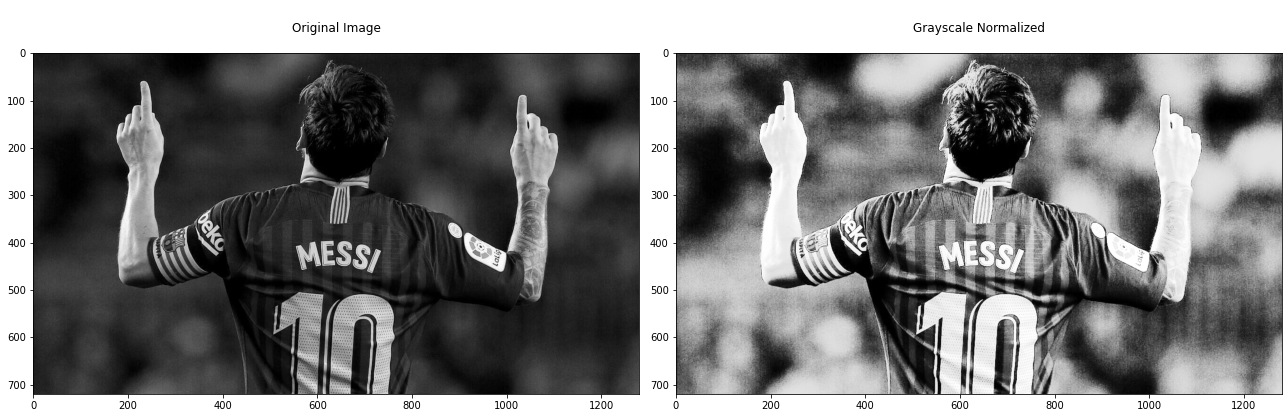

Wall time: 1.09 s


In [3]:
%%time
import numpy as np
from matplotlib import pyplot as plt
img_org = plt.imread( 'messi5.jpg', 0 ) # 영상 로딩
#img_org = plt.imread( 'Unequalized_Hawkes_Bay_NZ.jpg', 0 ) # 영상 로딩

img = np.sum( [0.299, 0.587, 0.114]*img_org, axis=2 ).astype(np.uint8) # 회색조 변환

# 히스토그램 추출 
xarr = np.arange( 0, 256, 1 )
yarr = np.zeros( 256 )

for x in xarr :
    yarr[ x ] = np.count_nonzero( img == x )
pass

# 이미지 평활화
Lmax = np.max( img ) #최대 화소값
N = img.itemsize # 영상 픽셀 개수
h = yarr   # 히스토그램
H = np.cumsum( h ) # 누적 히스토그램, 1 차원 배열

print( H )

img_norm = img.copy()   # 2차원 픽섹 배열
img_norm_1d = img_norm.ravel() # 영상을 1차원 픽셀 배열로 변환
img_norm_1d = H[ img_norm_1d ]*Lmax/N 

img_norm = img_norm_1d.reshape( img.shape[0], -1 ) # 영상 2차원 배열 변환

# 차트 출력 
fig, charts = plt.subplots( 1, 2, figsize=(18, 18) )
charts = charts.ravel() ; idx = 0 

chart = charts[idx]
chart.imshow( img, cmap='gray' ) ; 
chart.set_title( "\nOriginal Image\n" )
idx +=1 

chart = charts[idx]
chart.imshow( img_norm, cmap='gray' )
chart.set_title( "\nGrayscale Normalized\n" ) 
idx += 1 

plt.tight_layout(); plt.show()